# Quickstart
 
This tutorial provides a quick overview about the different tools available in `evomap`.  

In general, input data is expected in the form of either higher-dimensional feature vectors, or in the form of pairwise relationships. 

Given such data, `evomap` provides a flexible set of tools to process and manipulate the data, map it to lower-dimensional space, and to evaluate and explore the resultant maps.

## Background

**Last updated:** September 2022


This quickstart guide is based on the following paper. *If you use this package or parts of its code, please cite our work*.

**References**

<a name = "ref_1"></a>
``` 
[1]Matthe, M., Ringel, D. M., Skiera, B. (2022), "Mapping Market Structure Evolution", Marketing Science, forthcoming.
```


Read the **full paper** here (open access): <a href = 'https://doi.org/10.1287/mksc.2022.1385'>https://doi.org/10.1287/mksc.2022.1385</a>

**Contact:** For questions or feedback, please <a href = 'mailto:matthe@wiwi.uni-frankfurt.de'>get in touch</a>.

## Module Overview

`evomap` entails the following main modules:

1. `evomap.preprocessing`: Tools for preprocessing input data.
2. `evomap.mapping`: Tools for mapping input data to lower-dimensional space.
3. `evomap.printer`: Tools for drawing and annotating maps.
4. `evomap.metrics`: Tools for evaluating maps quantitatively.

Besides, it includes a few additional module (such as `evomap.datasets`, which provides example datasets used for these tutorials). 

## Example Application

For a high-level overview of how these modules work together, we generate a market structure map for the 'Text-Based Network Industry' (TNIC) data, provided by Hoberg & Philips. The original data is provided at https://hobergphillips.tuck.dartmouth.edu/. If you use these data, please cite their work.

### Step 1: Loading the Relationship Data

We use a smal subsample taken from these data. The sample is included in the `evomap.datasets` module. 

In [4]:
from evomap.datasets import load_tnic_sample_small
df_tnic_sample = load_tnic_sample_small()

In [5]:
df_tnic_sample.head()

,year,gvkey1,gvkey2,score,name1,name2,sic1,sic2,size1,size2
0,1998,1078,1602,0.0274,ABBOTT LABORATORIES,AMGEN INC,3845,2836,74.211937,36.866437
1,1999,1078,1602,0.0352,ABBOTT LABORATORIES,AMGEN INC,3845,2836,87.854384,48.541222
2,2000,1078,1602,0.0348,ABBOTT LABORATORIES,AMGEN INC,3845,2836,70.098508,93.428689
3,2001,1078,1602,0.0218,ABBOTT LABORATORIES,AMGEN INC,3845,2836,110.299430,34.410965
4,2002,1078,1602,0.0366,ABBOTT LABORATORIES,AMGEN INC,3845,2836,40.140853,42.840198


The data consists of a time-indexed *edgelist*. That is, each row corresponds to a firm-pair. The 'score' variable captures each pair's similarity.

To build a small subsample, we first select a handful of firms:

In [6]:
firms = ['APPLE INC', 'AT&T INC', 'COMCAST CORP', 'HP INC',
       'INTUIT INC', 'MICROSOFT CORP', 'ORACLE CORP', 'US CELLULAR CORP',
       'WESTERN DIGITAL CORP']

We then collect these firms' pairwise relationships at a single point in time:

In [7]:
df_tnic_sample = df_tnic_sample.query('year == 2000').query('name1 in @firms').query('name2 in @firms')
df_tnic_sample.head()

,year,gvkey1,gvkey2,score,name1,name2,sic1,sic2,size1,size2
4796,2000,1690,5606,0.0314,APPLE INC,HP INC,3663,3570,60.079253,190.637477
4852,2000,1690,11399,0.0813,APPLE INC,WESTERN DIGITAL CORP,3663,3572,10.652736,15.988003
4884,2000,1690,12141,0.0930,APPLE INC,MICROSOFT CORP,3663,7372,44.120740,619.890226
4904,2000,1690,12142,0.0096,APPLE INC,ORACLE CORP,3663,7370,33.605576,79.457232
10644,2000,3226,14369,0.0143,COMCAST CORP,US CELLULAR CORP,4841,4812,40.733093,9.311580


To process these data via mapping methods, we first need to transform the edgeliste into square matrix form: 

In [8]:
from evomap.preprocessing import edgelist2matrix
sim_mat, labels = edgelist2matrix(
    df_tnic_sample, score_var = 'score', id_var_i= 'name1', id_var_j= 'name2')

In [9]:
sim_mat.round(2)

array([[0.  , 0.  , 0.  , 0.03, 0.  , 0.09, 0.01, 0.  , 0.08],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  ],
       [0.03, 0.  , 0.  , 0.  , 0.  , 0.06, 0.1 , 0.  , 0.04],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.04, 0.  , 0.  , 0.  ],
       [0.09, 0.  , 0.  , 0.06, 0.04, 0.  , 0.08, 0.  , 0.06],
       [0.01, 0.  , 0.  , 0.1 , 0.  , 0.08, 0.  , 0.  , 0.02],
       [0.  , 0.02, 0.01, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.08, 0.  , 0.  , 0.04, 0.  , 0.06, 0.02, 0.  , 0.  ]])

As a result, we obtain a symmetric matrix of pairwise similarities. 

In [10]:
import numpy as np 
print("Smallest matrix entry: {0:.2f} \n Largest matrix entry: {1:.2f}".format(np.min(sim_mat), np.max(sim_mat)))
print("Similarity between {0} and {1}: {2:.2f}".format(labels[5], labels[6], sim_mat[5,6]))
print("Similarity between {0} and {1}: {2:.2f}".format(labels[0], labels[3], sim_mat[0,3]))

Smallest matrix entry: 0.00 
 Largest matrix entry: 0.10
Similarity between MICROSOFT CORP and ORACLE CORP: 0.08
Similarity between APPLE INC and HP INC: 0.03


### Step 2: Preprocessing

Different mapping methods require different input data. Here, the input data connsists of *pairiwse similarities*. We will map them to 2D space via Classic Multidimensional Scaling (CMDS). CMDS, however, requires *pariwise distances*. Among other features, `evomap.preprocessing` provides various transformations between such different types of relationship data.

One simple way to transform similarities to distances is by mirroring them:  

In [11]:
from evomap.preprocessing import sim2dist
dist_mat = sim2dist(sim_mat, transformation= 'mirror')
print("Smallest matrix entry: {0:.2f} \n Largest matrix entry: {1:.2f}".format(np.min(dist_mat), np.max(dist_mat)))
print("Distance between {0} and {1}: {2:.2f}".format(labels[5], labels[6], dist_mat[5,6]))
print("Distance between {0} and {1}: {2:.2f}".format(labels[0], labels[3], dist_mat[0,3]))

Smallest matrix entry: 0.00 
 Largest matrix entry: 0.10
Distance between MICROSOFT CORP and ORACLE CORP: 0.02
Distance between APPLE INC and HP INC: 0.07


### Step 3: Mapping relationship data to lower-dimensional space

With all input data in the right format, you can map it to lower-dimensional space. 
To do so, `evomap.mapping` provides implementations of multiple different mapping methods. 

Here, we apply (Classic) Multidimensional Scaling (aka. Principal Coordinate Analysis):

In [12]:
from evomap.mapping import CMDS
model = CMDS(n_dims = 2).fit(dist_mat)
map_coords = model.Y_

The resultant model output is a 2D array of shape (n_samples, 2) containing the map coordinates.

In [13]:
map_coords.shape

(9, 2)

### Step 4: Draw the map

To visualize the estimated map coordinates, `evomap.printer` provides several functions (such as ```draw_map()```), which can create highly customizable maps.

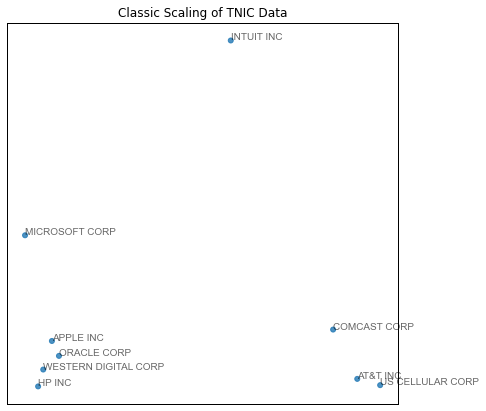

In [14]:
from evomap.printer import draw_map
draw_map(Y = map_coords,
        labels = labels,
        fig_size= (7,7),
        title_str = "Classic Scaling of TNIC Data")

### Step 5: Evaluating maps

Finally, `evomap.metrics` provides typically used metrics to evaluate the resultant maps' goodness-of-fit (such as the hitrate of nearest neighbor recovery, adjusted for random agreement):

In [12]:
from evomap.metrics import adjusted_hitrate_score 
score = adjusted_hitrate_score(
    X = dist_mat, Y = map_coords, n_neighbors = 3, input_type= 'distance')

print("Hitrate of 3-nearest neighbor recovery (adjusted or random agreement): {0:.2f}".format(score))

Hitrate of 3-nearest neighbor recovery (adjusted or random agreement): 0.33


Naturally, `evomap` becomes more useful when moving beyond such a very simple application. 

For such more complex examples, check out the further examples. 